# Sky Huang

## Research question/interests

**I want to look at the effects of humidity on the air quality, by looking at the level of CO, CO2, NO2, and other airborne molecules and particulates**. I plan to achieve this by splitting each CBSA zone into 3 categories using average relative humidity: Dry (relative humidity < 40), moderate (40 <= relative humidity <= 60), and Humid (relative humidity > 60). I plan to filter the data to isolate Dry and Humid metro areas, and then compare the air quality levels of these two groups.

## Plan 
1. Filter the data to isolate  Dry and Humid metro areas
2. look for collation between air quality and asthma levels in each group individually
3. check for collation between air quality in both groups combined
4. Analyze the data to see if there is a significant difference in air quality between the two groups



### PM3
One visualization in the EDA has shown that, at least at the state level, large bodies of water does not seem to impact air qualities to a significant degree. However, that may change as I look at each individual CBSA zone and control for loose variables such as population sizes. As such, I do not believe my RQ and plan needs further adjustments at this time.

### PM4 (Analysis draft)

#### Foreword: 
Before the analysis proper begins, it must be acknowledged that, this dataset involves inherent bias in regards to humidity, with dry CBSA zones being vastly out numbered by Humid and Moderate CBSA zones, as can be seen in the humidity per CBSA zone figure. This is partly because the US' unique geography, and partly because the more dry areas are more likely to be rural, and thus less likely to have a CBSA zone.

### Analysis:  
For this analysis, the data is filtered to isolate CBSA zones in Dry and Humid areas, with **"Dry"** areas being defined as having an average relative humidity < 40, "Humid" areas being defined as having an average relative humidity > 60, and **"Moderate"** The data is then analyzed to see if there is a significant difference in air quality between the two groups.  

looking at the bar plots for gaseous molecules at different humidity levels, it can be observed that effect of humidity on the air quality is not consistent through out all parameters, with some parameters such as sulphur dioxide, and carbon dioxide being better in dry areas, and most others being better in humid areas. However, when looking at the box plots for the same dataset, it can be observed that some cases of better air quality in Dry areas is due to extreme outliers in humid areas, and that the median values in humid areas are in fact very comparable to dry areas, even in the most favorable parameters for Dry areas.  

A similar story plays out when looking at particulate matter, with bar plots showing that certain particulate matter is better in dry areas while most are better in humid areas, and box plots showing that the median values in humid areas are comparable to dry areas. However, here is where the aforementioned bias comes into play, as the number of CBSA zones in dry areas is so small that numerous parameters simply do not have enough data to be plotted, and thus the plots for dry areas are not shown.    

Moving on from the analysis of gaseous molecules and particulate matter, the correlation between median AQI (the median is used to prevent outliers from skewing the results) and relative humidity is also analyzed, and unlike with the gaseous molecules and particulate matter, the correlation is extremely apparent and consistent across the 11 years of data. This is likely due to the definition of AQI, as it is a aggregate metric of various types of gaseous molecules and particulate matter, and thus the correlation between median AQI and relative humidity is a composite of the correlations between all the gaseous molecules and particulate matter. As previously established, most parameters are better in humid areas, and thus it follows that the correlation between median AQI and relative humidity would follow suit. The scatter plot of median AQI over relative humidity (numeric) also shows this trend.   

Furthermore, there are serval choropleths showing the geographical locations of each CBSA zone, with the color of each zone representing the one of serval parameters, such as the median AQI of that zone. These choropleths are each divided into 4 subplots, with one showing every CBSA zone, one showing only CBSA zones in dry areas, one showing only CBSA zones in humid areas, and one showing only CBSA zones in moderate areas. This is done to see if there is a difference in the geographical distribution of the parameters between the three humidity levels. It is through these choropleths that the bias in the data is most apparent, as the number of CBSA zones in dry areas can be counted on one hand.  

#### Conclusion and afterthoughts:
Thus, it can be observed that the air quality in humid areas is, on average, better than in dry areas. There are a few exceptions to this, such as sulphur dioxide and carbon dioxide, which are better in dry areas. However, this is likely due to the extreme outliers in humid areas, and aggregate metrics such as median AQI show strong, consistent correlations with high relative humidity. One potential explanation for this is the recent (2020s) forest fires in the western US where most Dry areas are located, which may have caused a spike in various parameters in the surrounding areas. However, I am skeptical of this explanation, as even the data from 2011 shows a similar trend, and those data far predate the recent forest fires. Another potential explanation of this is because the air quality in dry areas is heavily influenced by the air quality in the surrounding areas, while the air quality in humid areas is not. This is because humid areas are surrounded by water, which acts as a barrier to the air quality in the surrounding areas. This hypothesis would need to be tested with more data, and thus is not discussed further here.



In [2]:
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import re
import geoplot as gplt
import geoplot.crs as gcrs
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions2 as pf
else:
    __import__("sys").path.append("./code")
    import project_functions2 as pf
    

In [28]:
__import__("importlib").reload(pf)

<module 'project_functions2' from '/mnt/c/Data301/project-group-group04/analysis/./code/project_functions2.py'>

/home/costcologist/.pyenv/versions/3.11.1/envs/Data301/lib/python3.11/site-packages/geopandas/geodataframe.py:2323: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:4326

  return geopandas.overlay(
/home/costcologist/.pyenv/versions/3.11.1/envs/Data301/lib/python3.11/site-packages/geopandas/geodataframe.py:2323: UserWarning: `keep_geom_type=True` in overlay resulted in 12 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


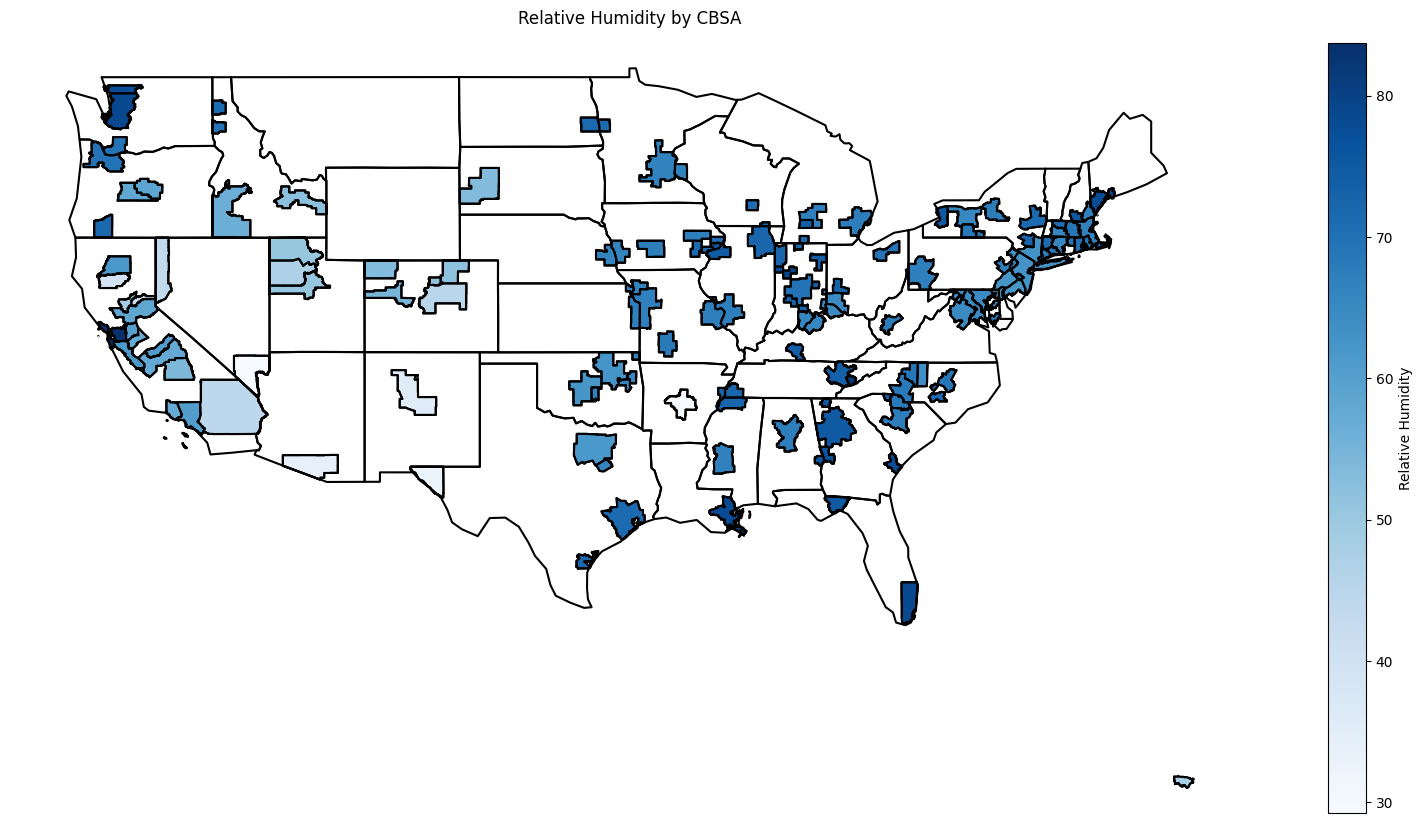

In [7]:
shapedata: gpd.GeoDataFrame = gpd.read_file(gplt.datasets.get_path("contiguous_usa"))
df = pf.processing()
mappoly = pf.mapprep(df[df['Parameter Name'] == "Relative Humidity "]).overlay(shapedata, how="union")
ax = mappoly.boundary.plot(figsize=(20, 20), color="black")
ax.set_axis_off()
mappoly.plot(ax = ax, column="Arithmetic Mean", cmap="Blues", legend=True, legend_kwds={'label': "Relative Humidity", 'shrink': 0.5}).title.set_text("Relative Humidity by CBSA")


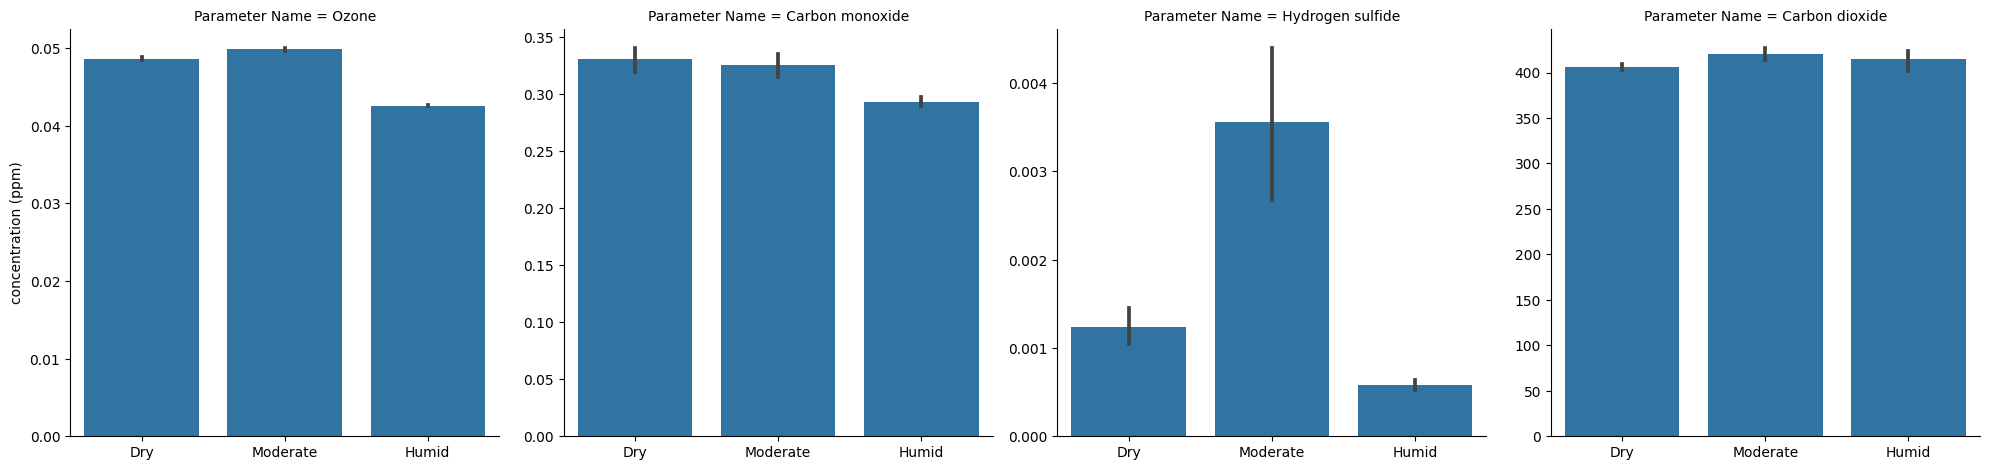

In [7]:
df = pf.wrangling()
df = df[df["Parameter Name"].isin(["Ozone", "Carbon monoxide", "Carbon dioxide", "Hydrogen sulfide"])]
sns.FacetGrid(df, col="Parameter Name", height=5, aspect=1,sharey=None, col_wrap=4,sharex=None).map_dataframe(sns.barplot, y = "Arithmetic Mean", x = "Dryness", order= ["Dry", "Moderate", "Humid"]).set_axis_labels("", "concentration (ppm)")

Bargraphs of gaseous molecules measured in parts per million (ppm) at different humidity levels. From these, no particular trend can be observed.

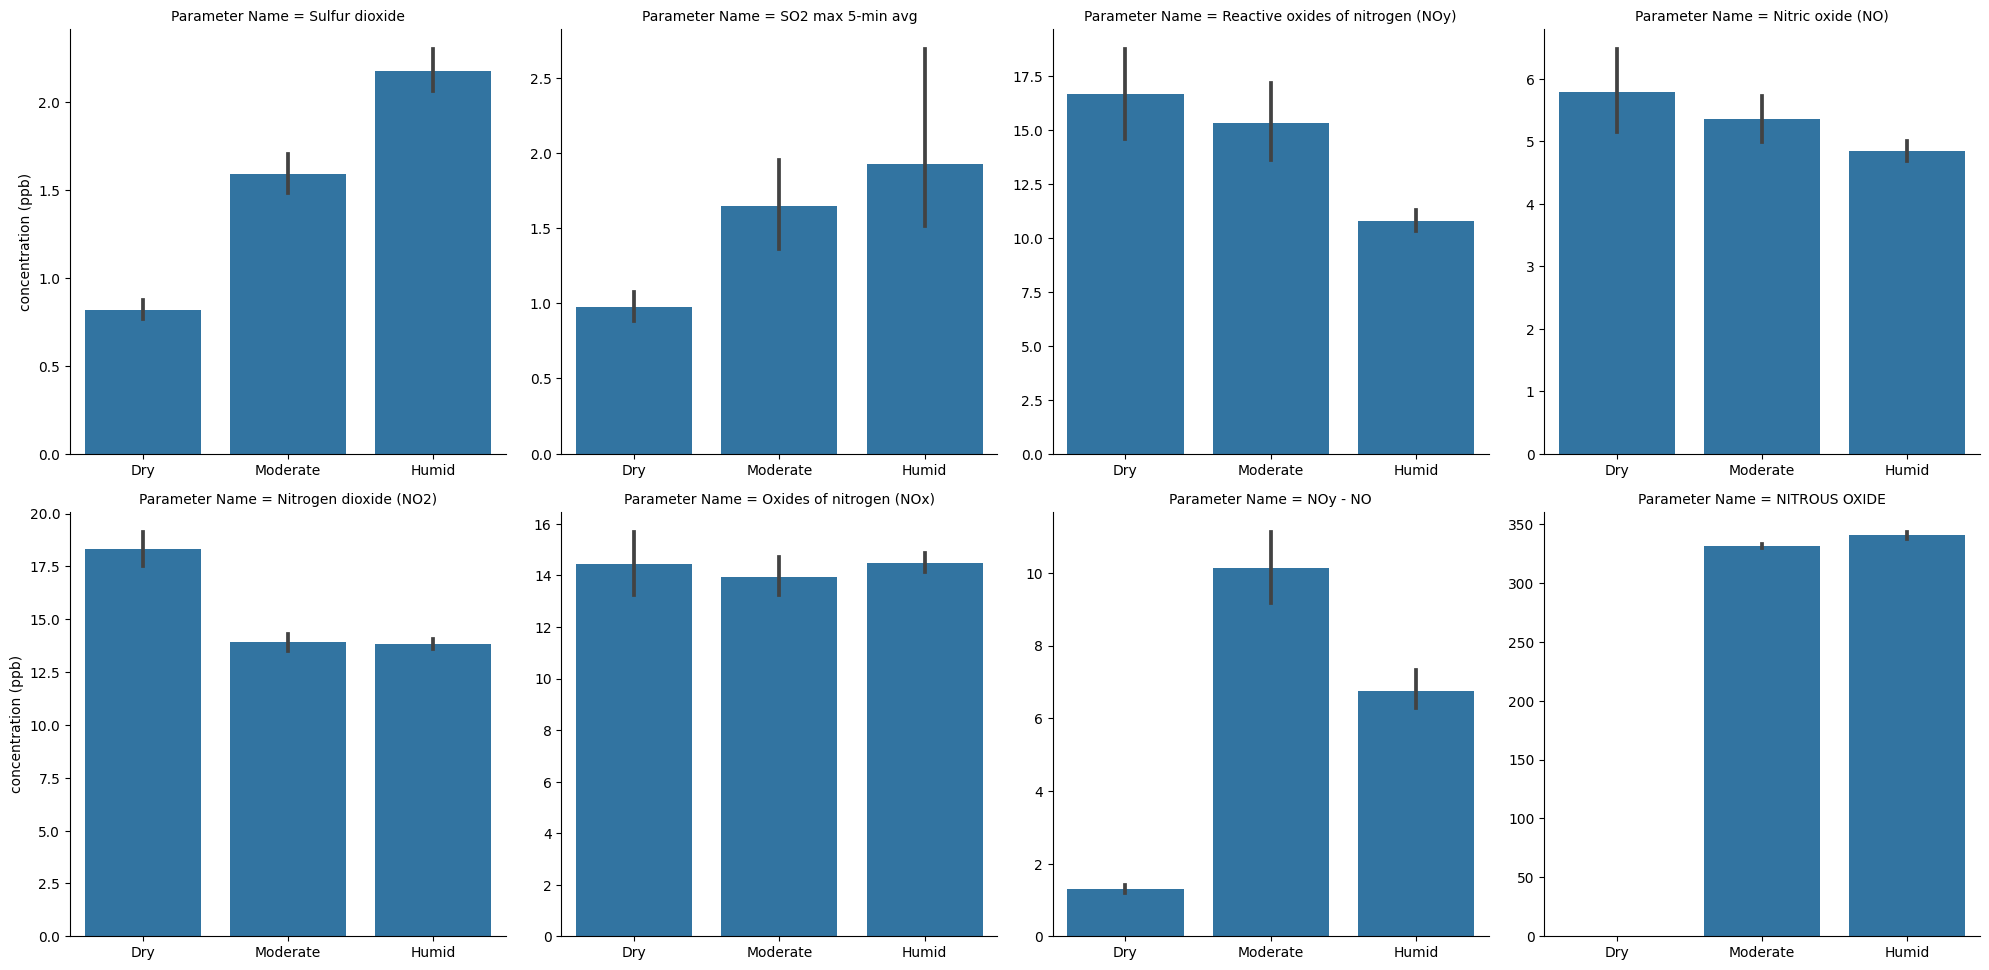

In [6]:
df = pf.wrangling()
df = df[df["Units of Measure"].isin(["Parts per billion"])]
sns.FacetGrid(df, col="Parameter Name", height=5, aspect=1,sharey=None, col_wrap=4,sharex=None).map_dataframe(sns.barplot, y = "Arithmetic Mean", x = "Dryness", order= ["Dry", "Moderate", "Humid"]).set_axis_labels("", "concentration (ppb)")

Bargraphs of gaseous molecules measured in parts per billion (ppb) at different humidity levels. From these, no particular trend can be observed. However, it can be observed that the number of CBSA zones in dry areas is so small that the bargraph for Nitrous Oxide do not show dry areas.

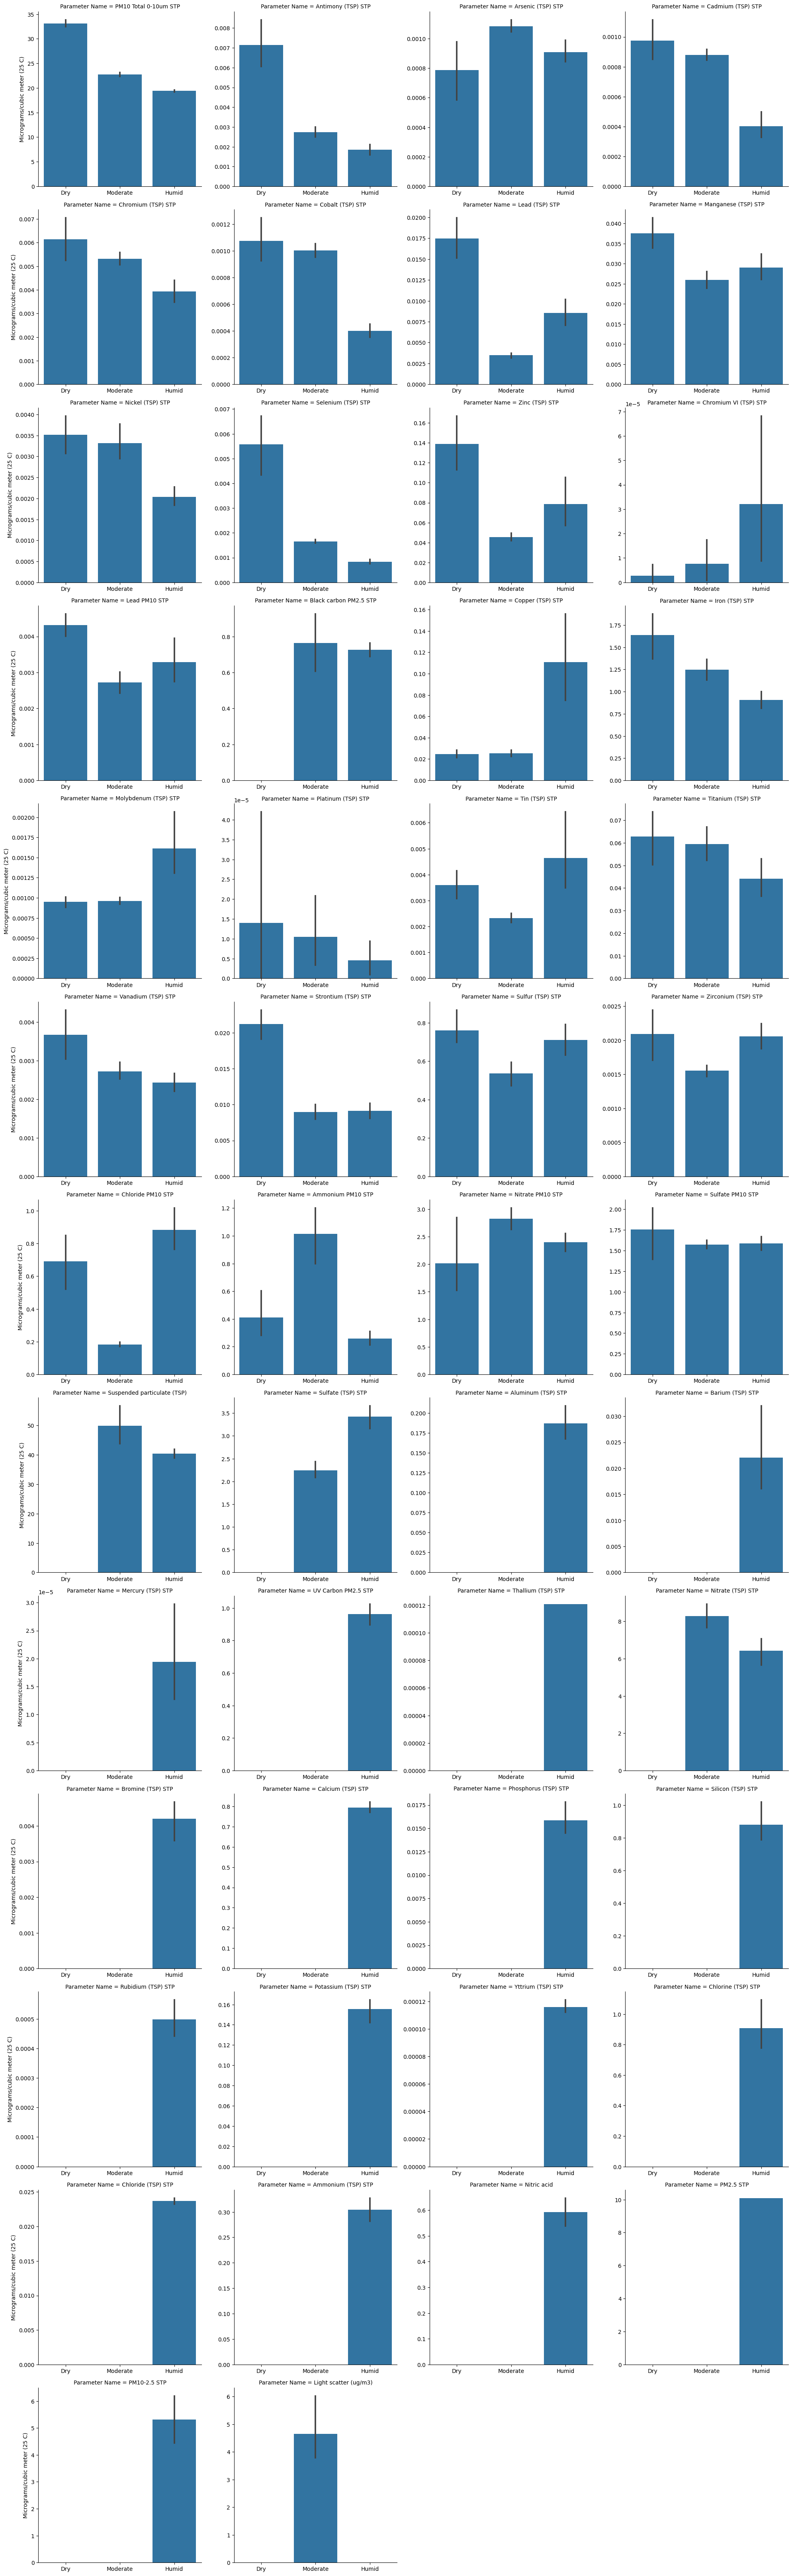

In [16]:
df = pf.wrangling()
df = df[df["Units of Measure"].isin(["Micrograms/cubic meter (25 C)"])]
sns.FacetGrid(df, col="Parameter Name", height=5, aspect=1,sharey=None, col_wrap=4,sharex=None).map_dataframe(sns.barplot, y = "Arithmetic Mean", x = "Dryness", order= ["Dry", "Moderate", "Humid"]).set_axis_labels("", "Micrograms/cubic meter (25 C)")

Barplots of particulate matter measured in micrograms per cubic meter (μg/m3) at different humidity levels. From these, it can be observed that Humid areas typically have fewer particulates than dry areas, with few exceptions such as Chromium (VI), which is better in dry areas. Note that for many parameters, the number of CBSA zones in dry areas is so small that the bargraphs for dry areas do not show.

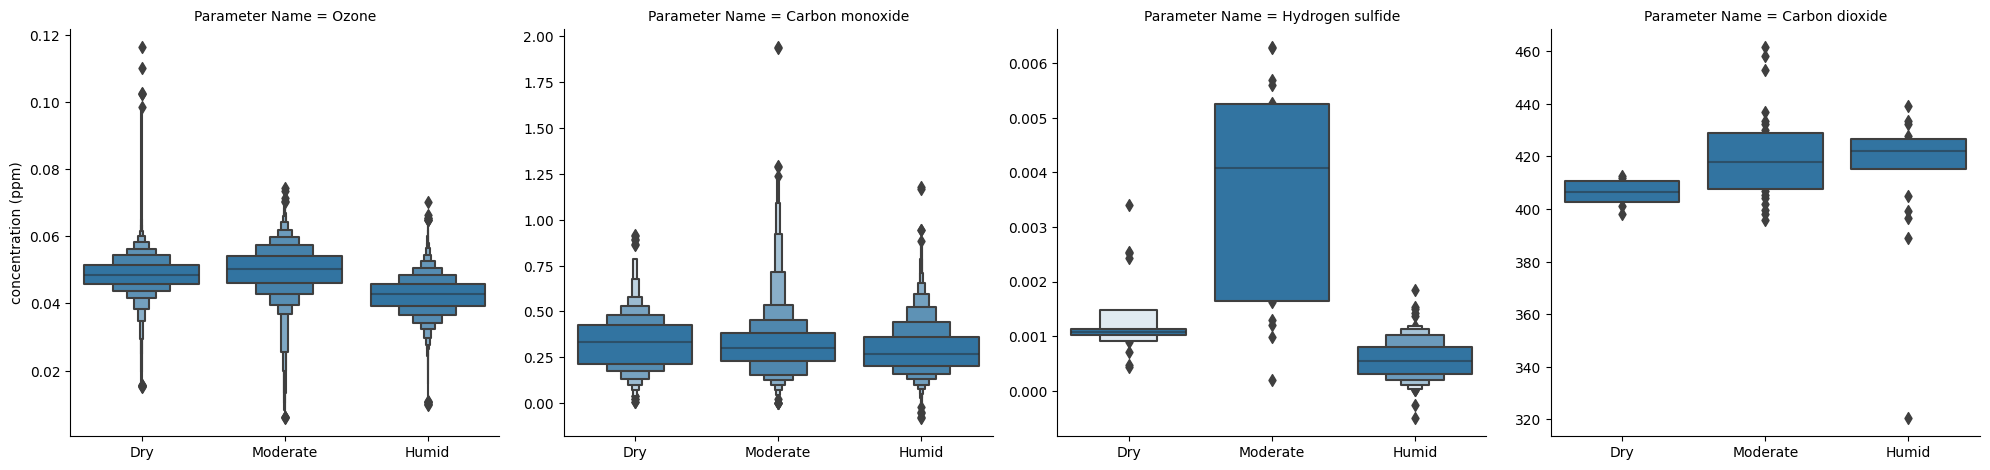

In [8]:
df = pf.wrangling()
df = df[df["Parameter Name"].isin(["Ozone", "Carbon monoxide", "Carbon dioxide", "Hydrogen sulfide"])]
sns.FacetGrid(df, col="Parameter Name",col_wrap=4, height=5, aspect=1, sharey=None,sharex='none').map_dataframe(sns.boxenplot, x= "Dryness", y = "Arithmetic Mean", order= ["Dry", "Moderate", "Humid"]).set_axis_labels("", "concentration (ppm)")

Boxplots for gaseous molecules measured in parts per million (ppm) at different humidity levels. From these, it can be observed that the median values in humid areas are always comparable if not superior to dry areas, something that is not apparent in the barplots.

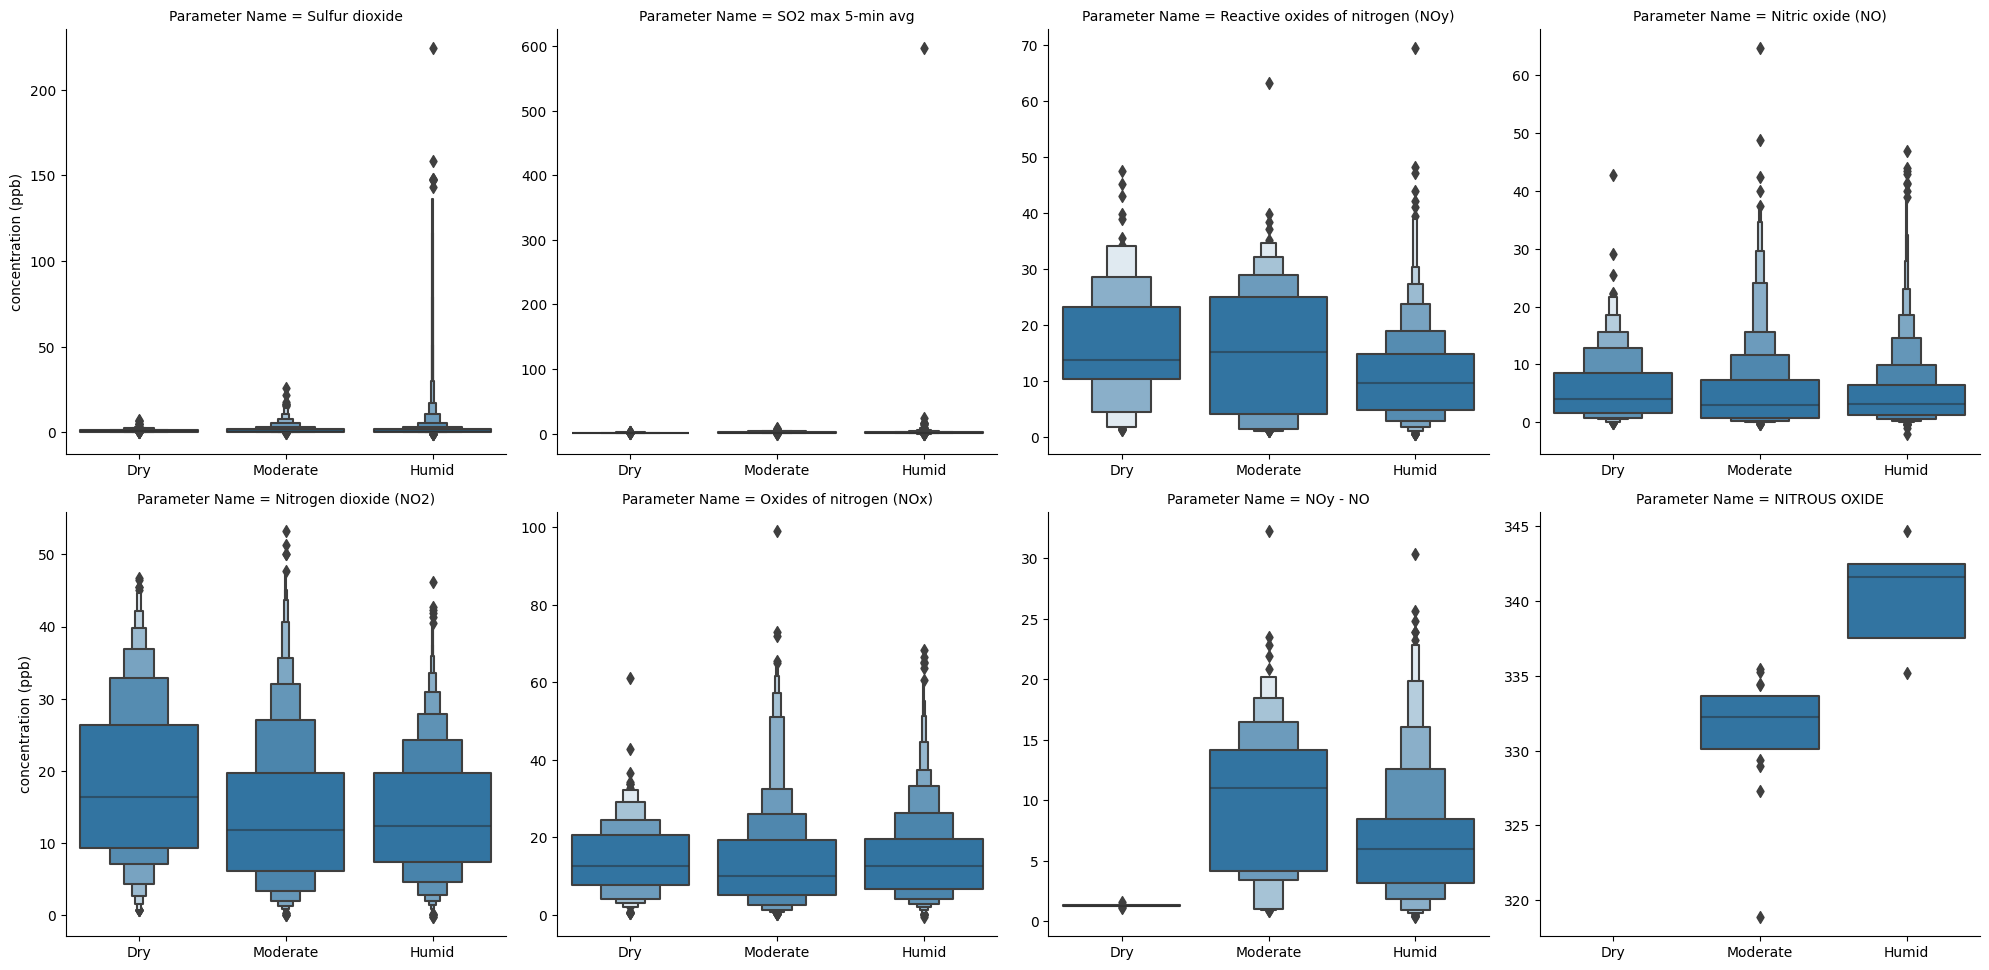

In [9]:
df = pf.wrangling()
df = df[df["Units of Measure"].isin(["Parts per billion"])]
sns.FacetGrid(df, col="Parameter Name",col_wrap=4, height=5, aspect=1, sharey=None,sharex='none').map_dataframe(sns.boxenplot, x= "Dryness", y = "Arithmetic Mean", order= ["Dry", "Moderate", "Humid"]).set_axis_labels("", "concentration (ppb)")

boxplots for gaseous molecules measured in parts per billion (ppb) at different humidity levels. Note that Humid areas seem to have a lot of outliers, which may be due to the fact that the number of CBSA zones in humid areas is so large that the outliers are more likely to be included in the data. This is most apparent when looking at Sulphur Dioxide, which has a lot of outliers in humid areas, but not in dry areas.

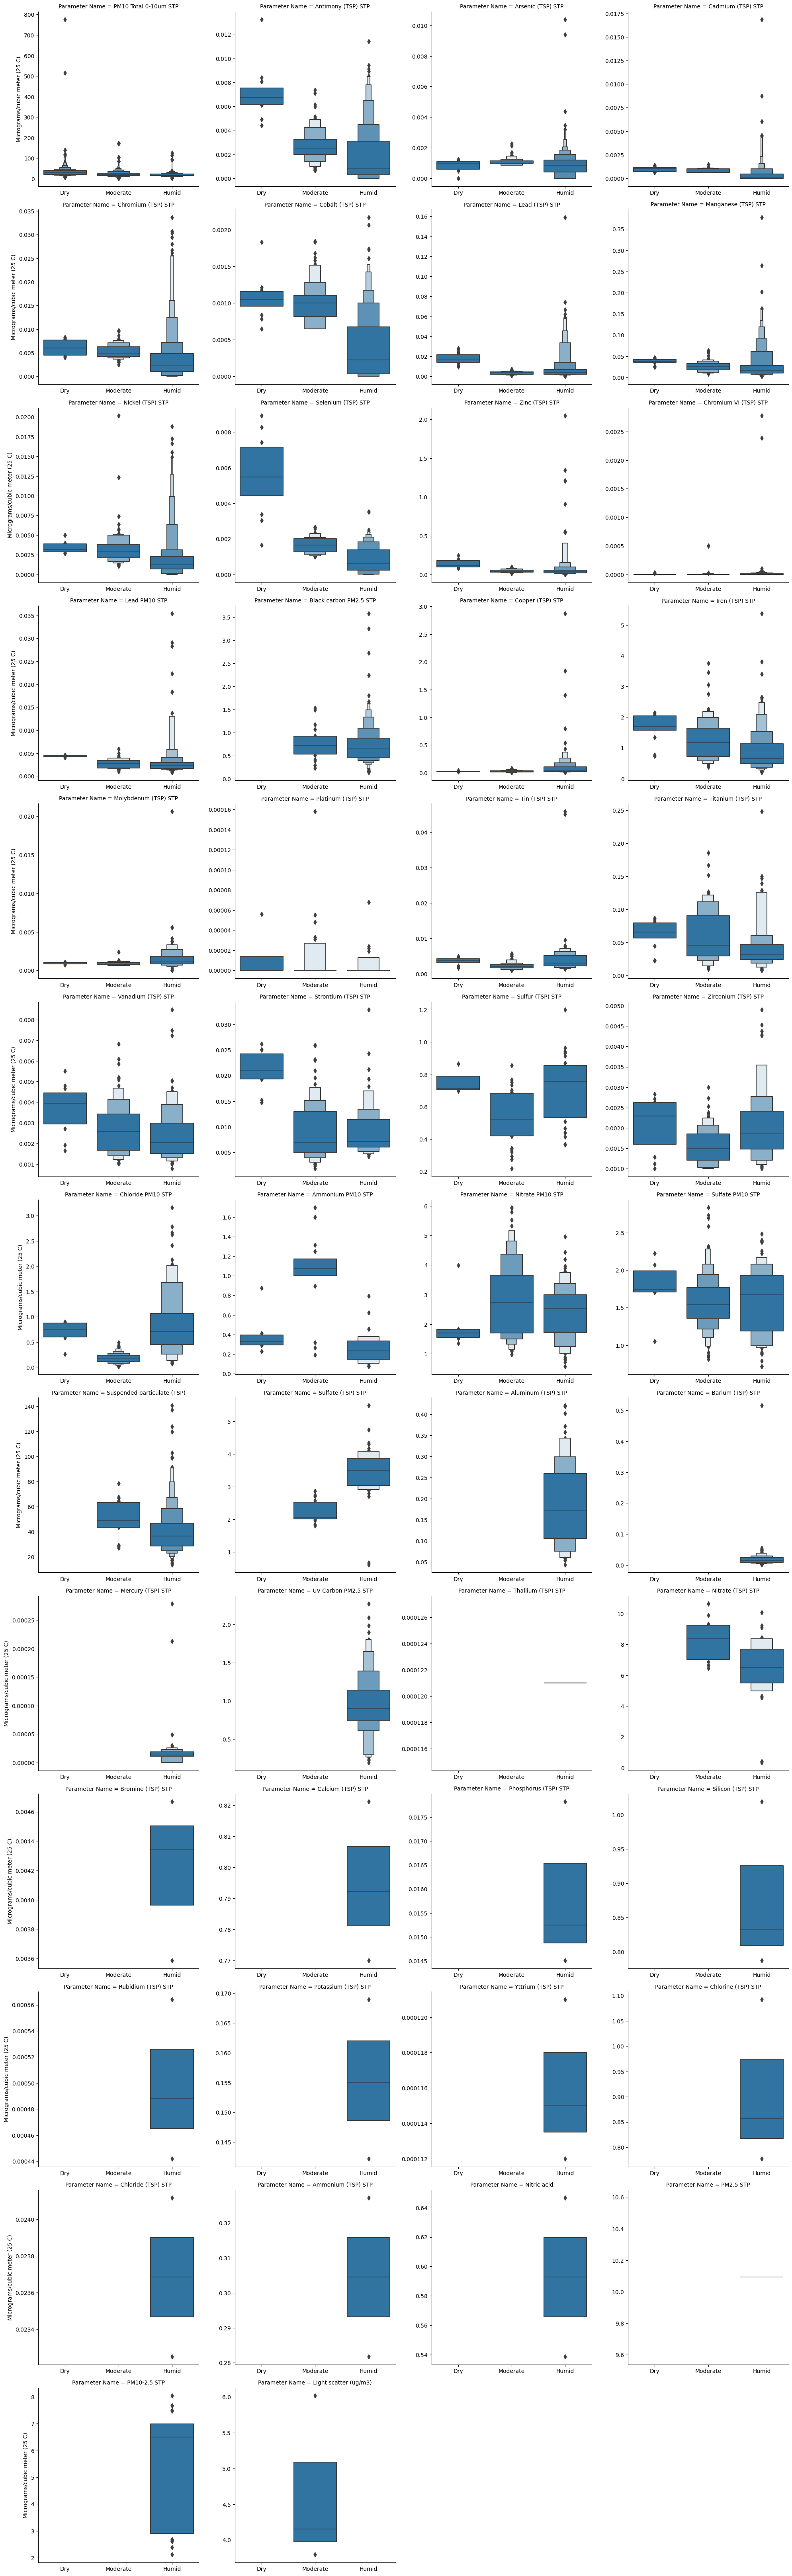

In [5]:
df = pf.wrangling()
df = df[df["Units of Measure"].isin(["Micrograms/cubic meter (25 C)"])]
sns.FacetGrid(df, col="Parameter Name",col_wrap=4, height=5, aspect=1, sharey=None,sharex='none').map_dataframe(sns.boxenplot, x= "Dryness", y = "Arithmetic Mean", order= ["Dry", "Moderate", "Humid"]).set_axis_labels("", "Micrograms/cubic meter (25 C)")

boxplots for particulate matter measured in micrograms per cubic meter (μg/m3) at different humidity levels. While the trend is similar to the barplots, it can be observed that Humid and moderate areas have much more variance than dry areas. This is likely due to the fact that the number of CBSA zones in dry areas is so small that the outliers are more likely to be excluded from the data.

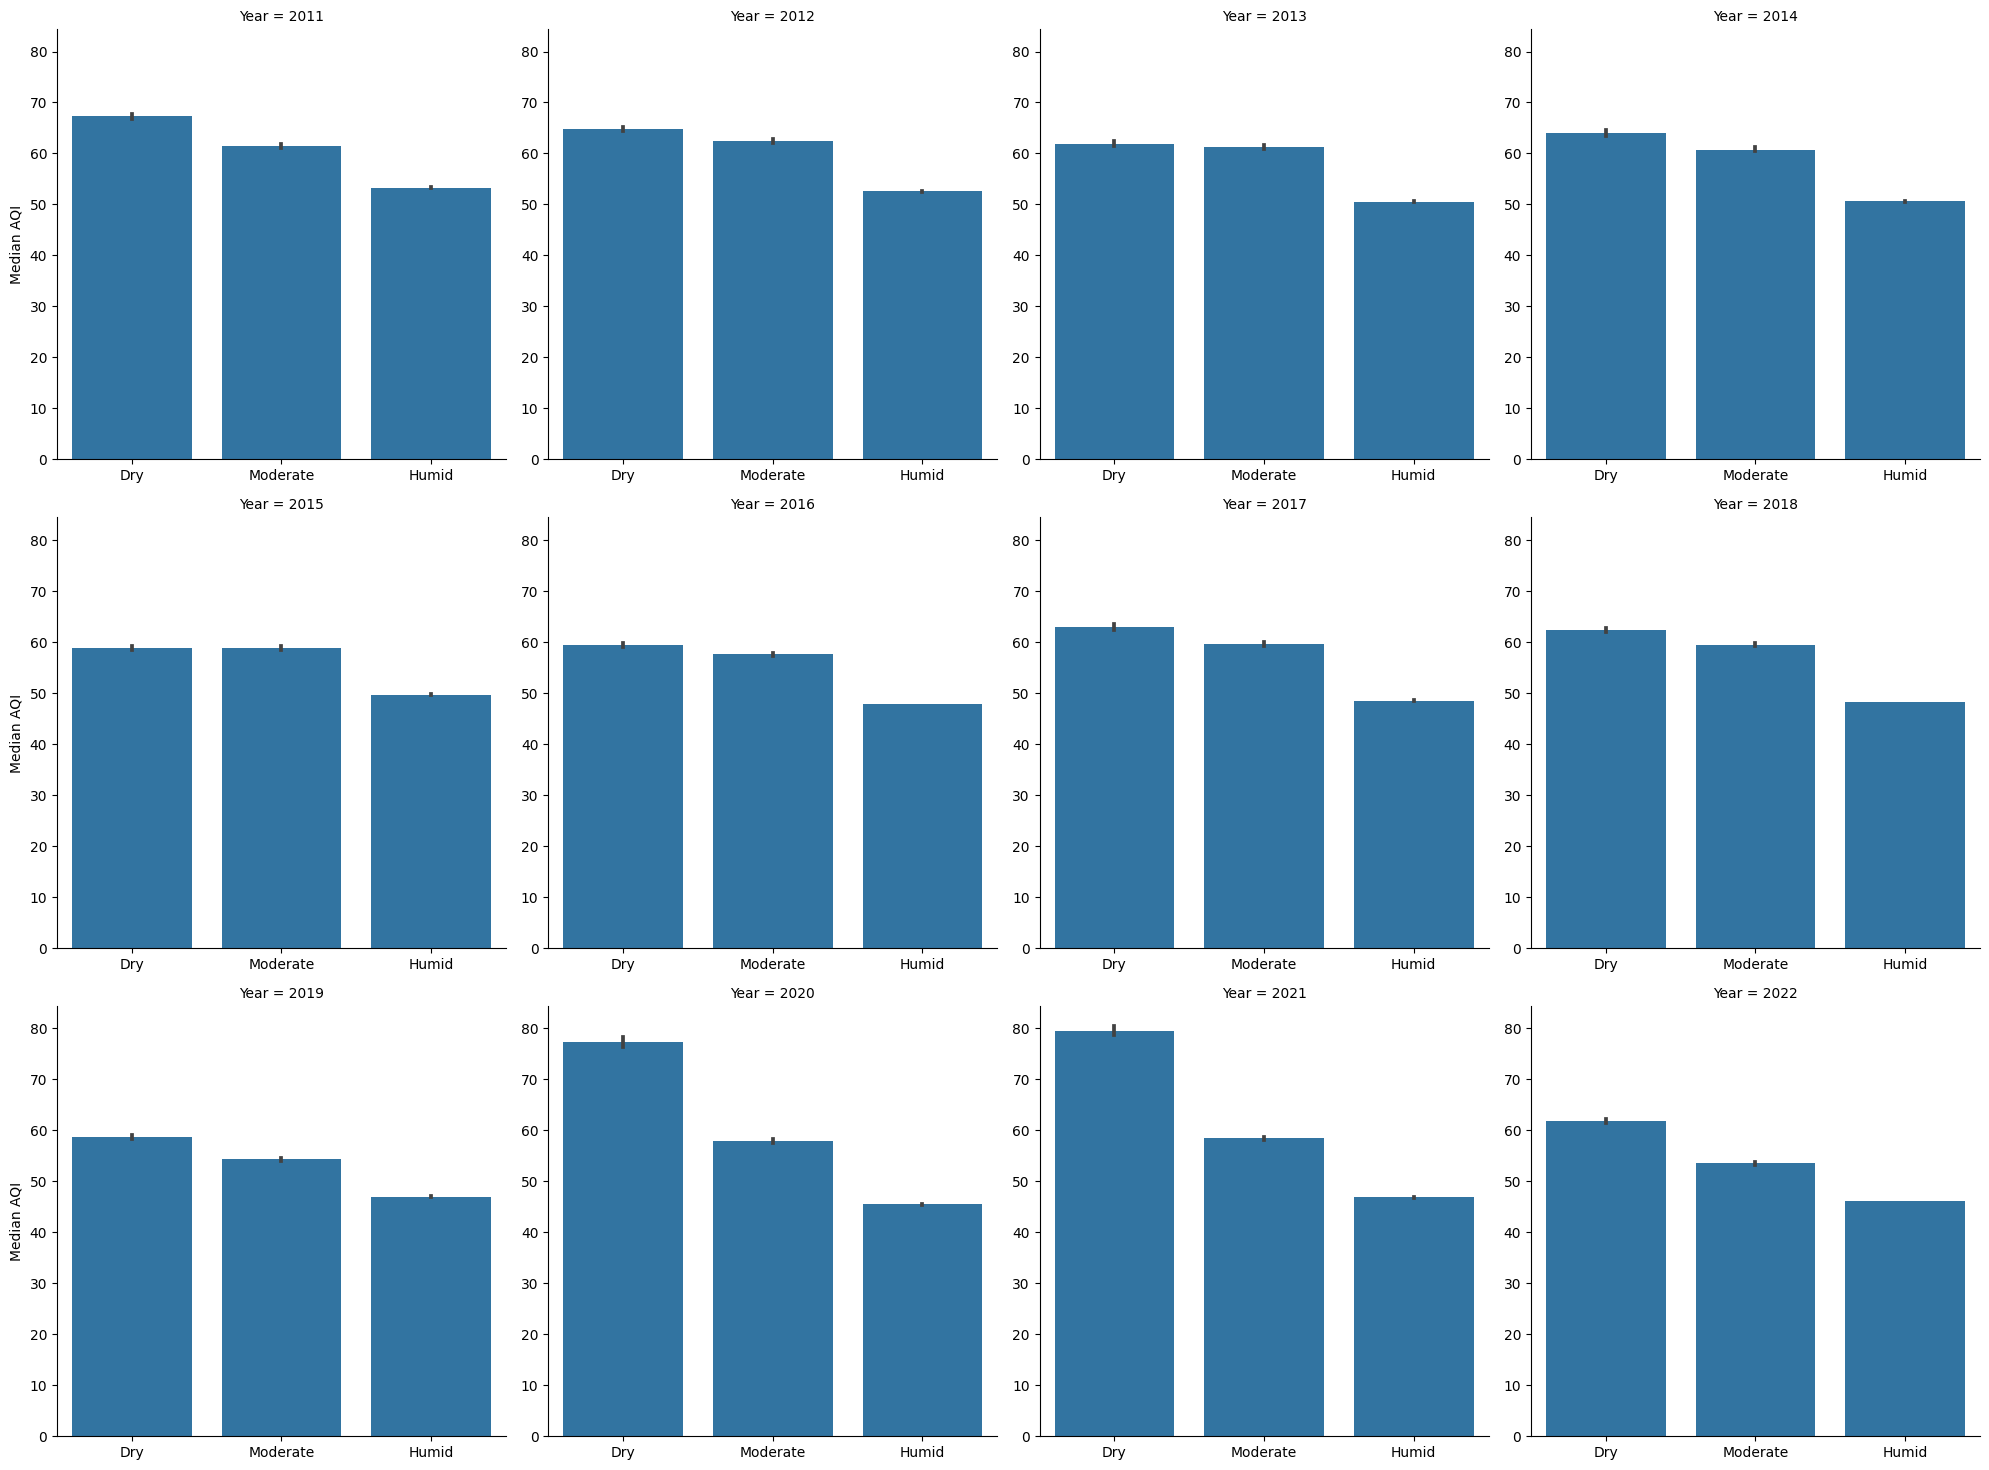

In [10]:
df = pf.wrangling()
#sns.barplot(df, x= "Dryness", y = "Median AQI", order= ["Dry", "Moderate", "Humid"]).set(title="Median AQI by Humidity Level", xlabel="", ylabel="Median AQI")
sns.FacetGrid(df, col="Year", height=5, aspect=1,sharey="all", col_wrap=4,sharex=None).map_dataframe(sns.barplot, y = "Median AQI", x = "Dryness", order= ["Dry", "Moderate", "Humid"]).set_axis_labels("", "Median AQI")

Barplots of median AQI at different humidity levels and years. From these, it can be observed that the median AQI is consistently higher in dry areas than in humid areas. While the trend is similar regardless of year, it is most apparent in 2020 to 2021, which may be due to the recent forest fires in the western US.

[Text(0.5, 1.0, 'Median AQI by Humidity Level'),
 Text(0.5, 0, 'Relative Humidity'),
 Text(0, 0.5, 'Median AQI')]

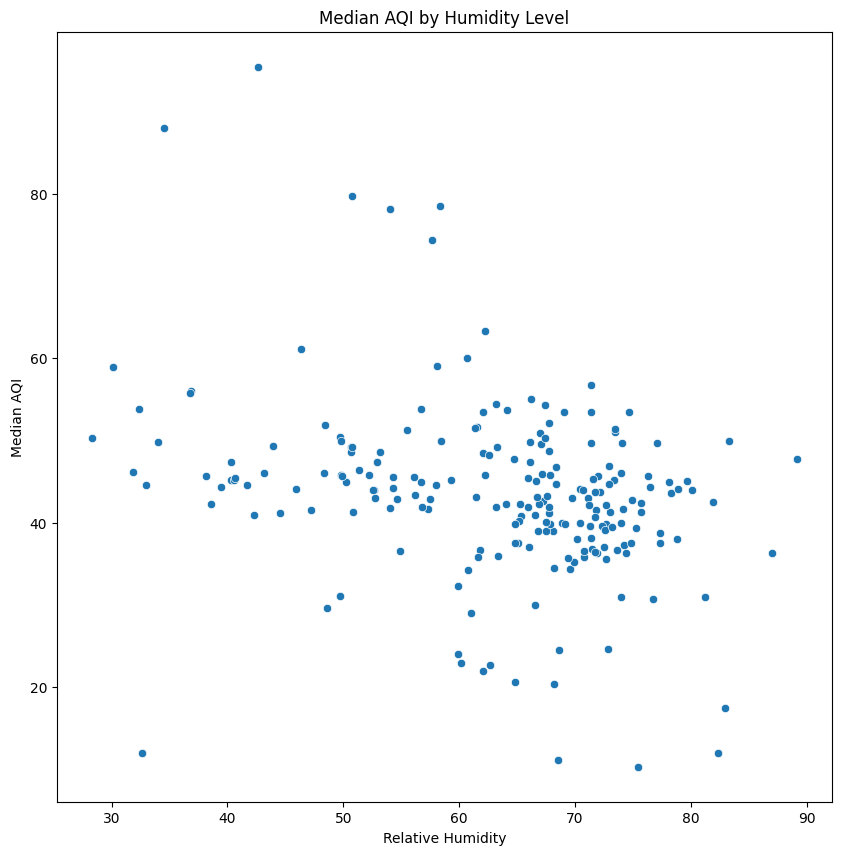

In [29]:
df=pf.processing()
df = df.loc[df["Parameter Name"] == "Relative Humidity ", ["Median AQI", "Arithmetic Mean","CBSA Name"]].groupby(["CBSA Name"])[["Median AQI", "Arithmetic Mean"]].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x="Arithmetic Mean", y="Median AQI", ax = ax).set(title="Median AQI by Humidity Level", xlabel="Relative Humidity", ylabel="Median AQI",)

Scatter plot of median AQI over relative humidity (numeric). From this, it can be observed that there is a statically significant correlation between median AQI and relative humidity.

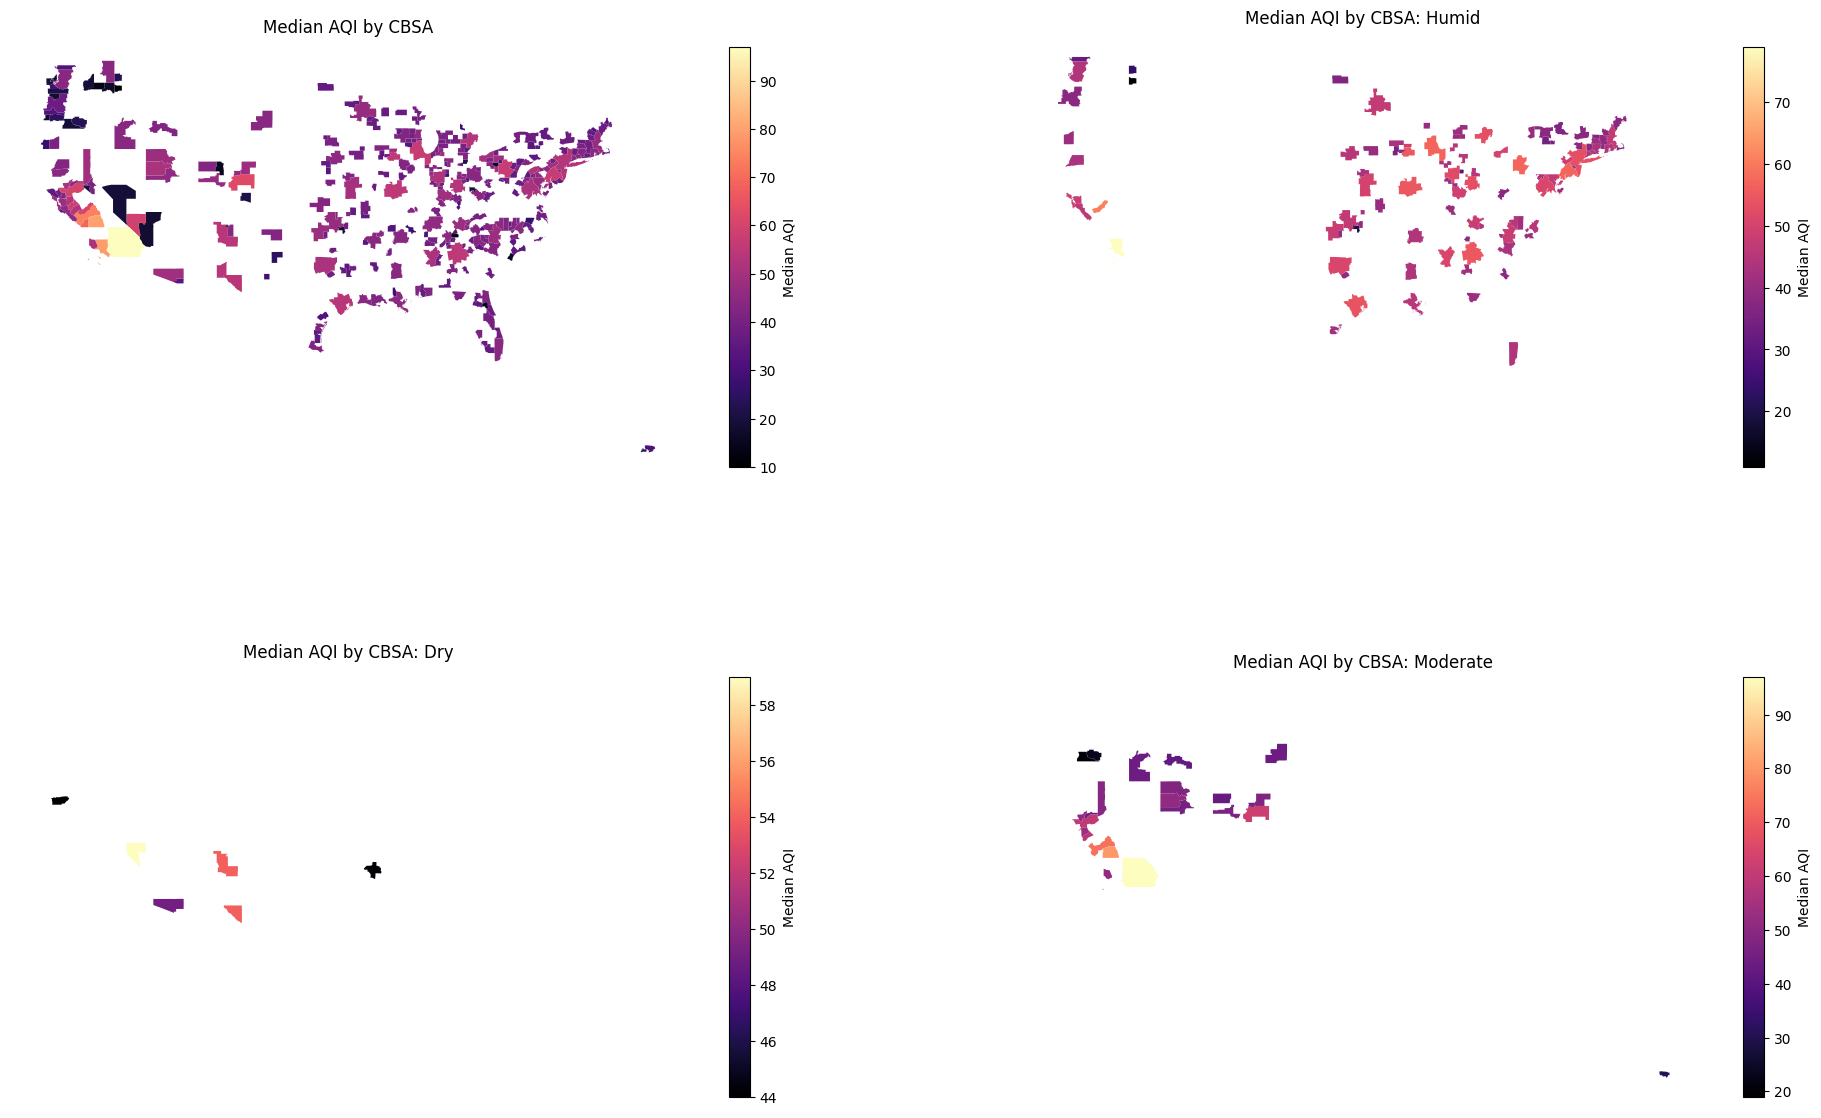

In [30]:
fig, axarr = plt.subplots(
    2,
    2,
    figsize=(24, 15),
    sharex=True,
    sharey=True,
    squeeze=True,
)
df = pf.wrangling()
axarr[0][0].set_axis_off()
mappoly = pf.mapprep()
mappoly.plot(ax = axarr[0][0], column="Median AQI", cmap="magma", legend=True, legend_kwds={'label': "Median AQI", 'shrink': 0.8}).title.set_text("Median AQI by CBSA")
for i, parameter in enumerate(["Dry", "Moderate", "Humid"]):
    df = pf.wrangling()
    if i < 1:
        mappoly = pf.mapprep(df[df['Dryness'] == parameter])
        axarr[i+1][0].set_axis_off()
        mappoly.plot(ax = axarr[i+1][0], column="Median AQI", cmap="magma", legend=True, legend_kwds={'label': "Median AQI", 'shrink': 0.8}).title.set_text(f"Median AQI by CBSA: {parameter}")
    else:
        mappoly = pf.mapprep(df[df['Dryness'] == parameter])
        axarr[i-2][1].set_axis_off()
        mappoly.plot(ax = axarr[i-2][1], column="Median AQI", cmap="magma", legend=True, legend_kwds={'label': "Median AQI", 'shrink': 0.8}).title.set_text(f'Median AQI by CBSA: {parameter}')

Cheoropleths of median AQI by CBSA zones. From these, it can be observed that the median AQI has both a higher minimum value and a lower maximum value in dry areas than in humid areas, and that there are very few CBSA zones in dry areas.

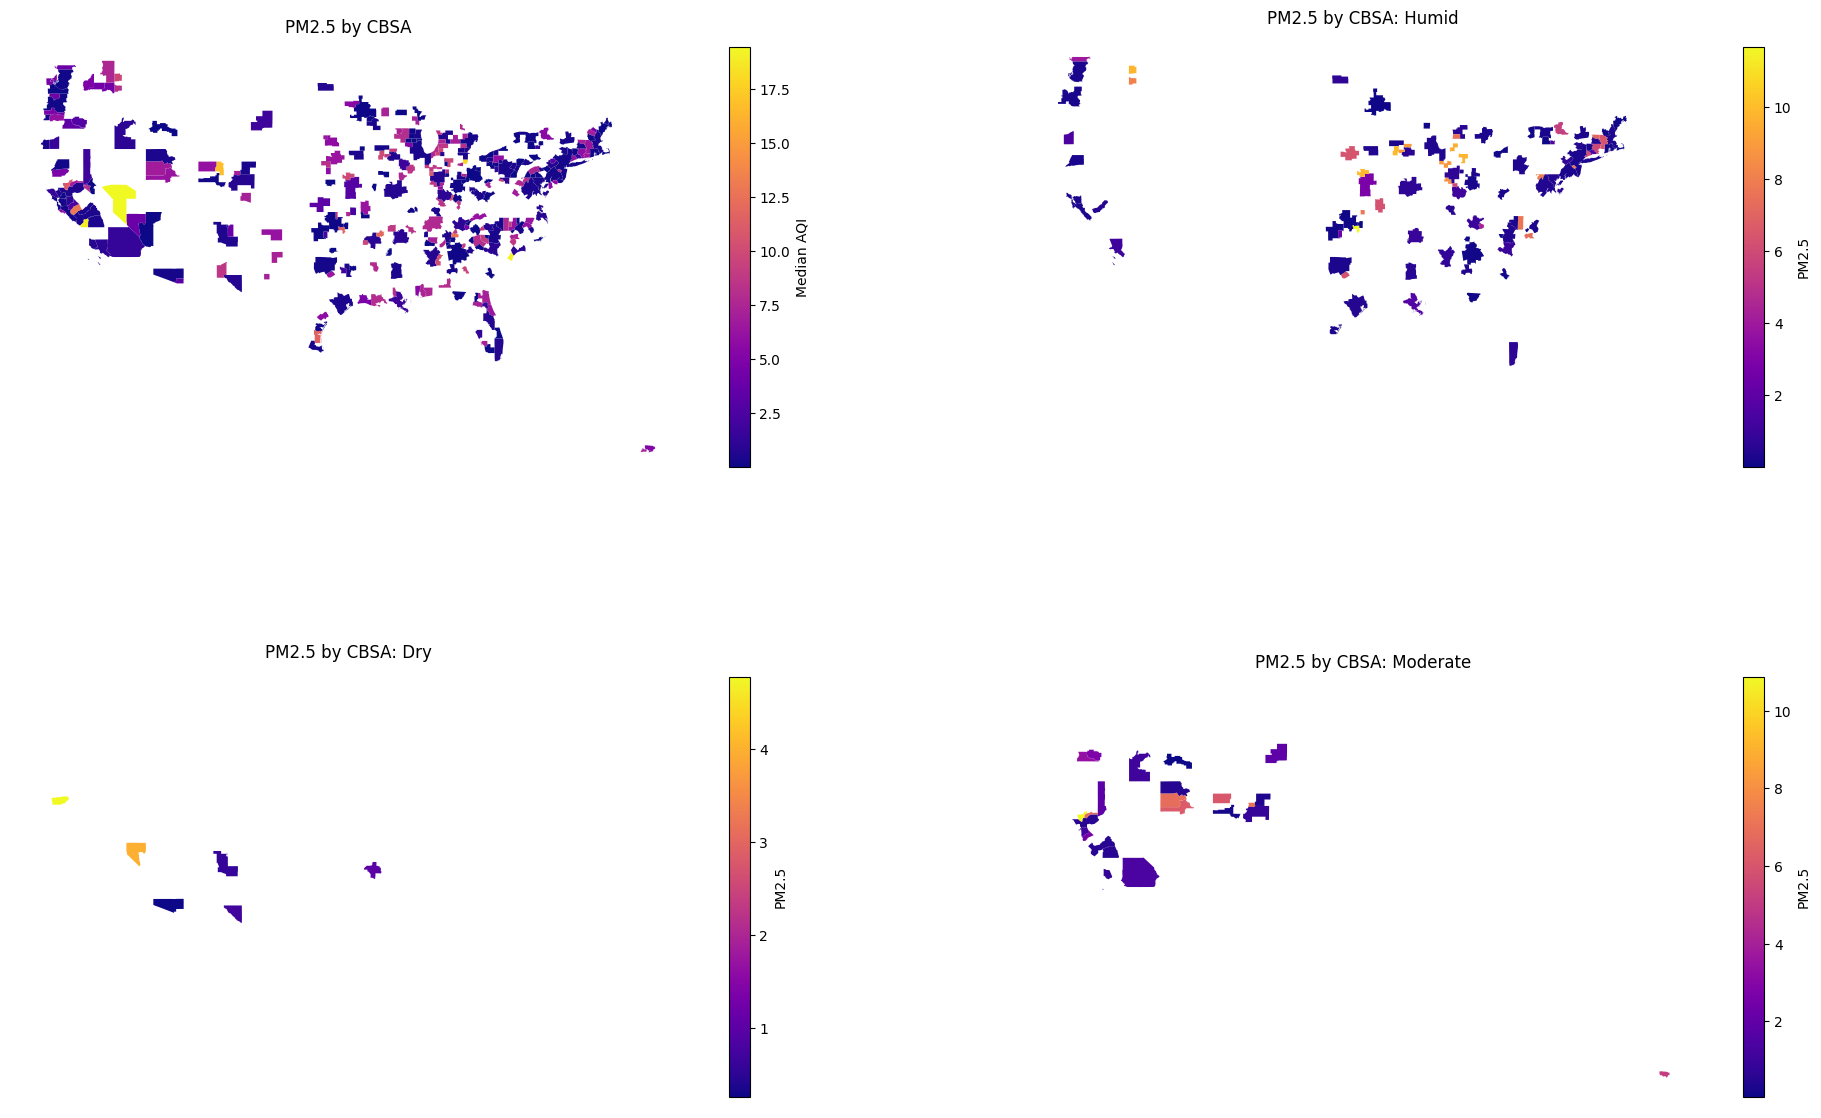

In [31]:
fig, axarr = plt.subplots(
    2,
    2,
    figsize=(24, 15),
    sharex=True,
    sharey=True,
    squeeze=True,
)
df = pf.wrangling()
df = df[df['Parameter Name'] == "Ozone - Local Conditions"]
axarr[0][0].set_axis_off()
mappoly = pf.mapprep()
mappoly.plot(ax = axarr[0][0], column="Arithmetic Mean", cmap="plasma", legend=True, legend_kwds={'label': "Median AQI", 'shrink': 0.8}).title.set_text("PM2.5 by CBSA")
for i, parameter in enumerate(["Dry", "Moderate", "Humid"]):
    df = pf.wrangling()
    if i < 1:
        mappoly = pf.mapprep(df[df['Dryness'] == parameter])
        axarr[i+1][0].set_axis_off()
        mappoly.plot(ax = axarr[i+1][0], column="Arithmetic Mean", cmap="plasma", legend=True, legend_kwds={'label': "PM2.5", 'shrink': 0.8}).title.set_text(f"PM2.5 by CBSA: {parameter}")
    else:
        mappoly = pf.mapprep(df[df['Dryness'] == parameter])
        axarr[i-2][1].set_axis_off()
        mappoly.plot(ax = axarr[i-2][1], column="Arithmetic Mean", cmap="plasma", legend=True, legend_kwds={'label': "PM2.5", 'shrink': 0.8}).title.set_text(f"PM2.5 by CBSA: {parameter}")

choropleths of PM 2.5 by CBSA zones.

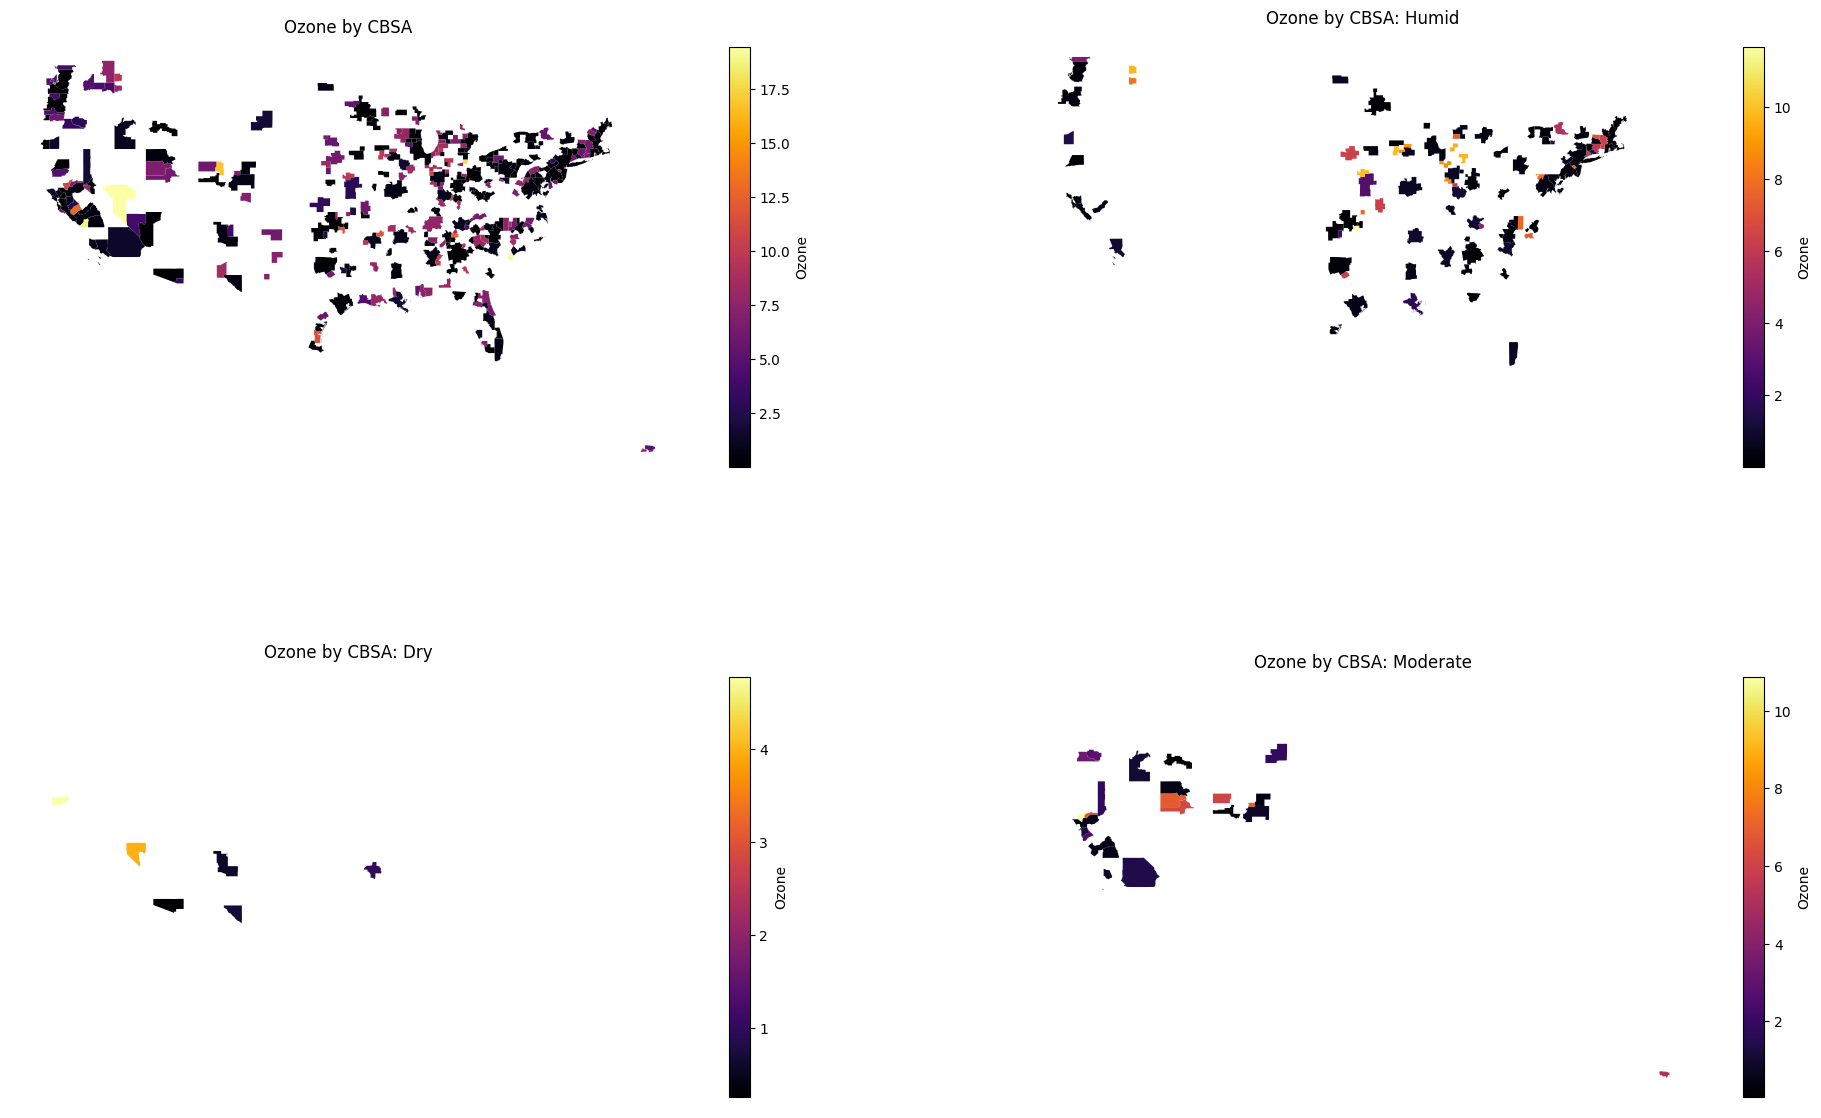

In [33]:
fig, axarr = plt.subplots(
    2,
    2,
    figsize=(24, 15),
    sharex=True,
    sharey=True,
    squeeze=True,
)
df = pf.wrangling()
df = df[df['Parameter Name'] == "Ozone"]
axarr[0][0].set_axis_off()
mappoly = pf.mapprep()
mappoly.plot(ax = axarr[0][0], column="Arithmetic Mean", cmap="inferno", legend=True, legend_kwds={'label': "Ozone", 'shrink': 0.8}).title.set_text("Ozone by CBSA")
for i, parameter in enumerate(["Dry", "Moderate", "Humid"]):
    df = pf.wrangling()
    if i < 1:
        mappoly = pf.mapprep(df[df['Dryness'] == parameter])
        axarr[i+1][0].set_axis_off()
        mappoly.plot(ax = axarr[i+1][0], column="Arithmetic Mean", cmap="inferno", legend=True, legend_kwds={'label': "Ozone", 'shrink': 0.8}).title.set_text(f"Ozone by CBSA: {parameter}")
    else:
        mappoly = pf.mapprep(df[df['Dryness'] == parameter])
        axarr[i-2][1].set_axis_off()
        mappoly.plot(ax = axarr[i-2][1], column="Arithmetic Mean", cmap="inferno", legend=True, legend_kwds={'label': "Ozone", 'shrink': 0.8}).title.set_text(f"Ozone by CBSA: {parameter}")

Choropleths of Ozone by CBSA zones.